In [1]:
import os
os.getcwd()

'C:\\Users\\dharani\\Downloads'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('loan.csv')

In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

# DATA CLEANING

In [6]:
#Removing Columns with unique values
df.drop(['id', 'member_id'],inplace=True,axis=1)

In [7]:
#Consider Columns having Object datatype
#'term','grade','sub_grade','emp_title','emp_length','home_ownership','verification_status',
#'issue_d','pymnt_plan','url','desc','purpose','title','zip_code','addr_state','earliest_cr_line','initial_list_status',
#'last_pymnt_d' ,'next_pymnt_d', 'last_credit_pull_d', 'application_type','verification_status_joint','loan_status'

In [8]:
df.drop(['grade','sub_grade'],axis=1,inplace=True) #Given by Platform

In [9]:
df.drop(['zip_code','addr_state'],axis=1,inplace=True) #Geographical information

In [10]:
df.drop(['issue_d','initial_list_status','last_pymnt_d' ,'next_pymnt_d', 'last_credit_pull_d','earliest_cr_line']
       ,axis=1,inplace=True) #values genreated once loan is issued

In [11]:
df.drop(['pymnt_plan','url'],axis=1,inplace=True) #irrelevant data

In [12]:
df.drop(['verification_status_joint'],inplace=True,axis=1) #morenull values

In [13]:
print("emp_title",df['emp_title'].nunique())
print("emp_length",df['emp_length'].nunique())
print("home_ownership",df['home_ownership'].nunique())
print("verification_status",df['verification_status'].nunique())
print("term",df['term'].nunique())
print("desc",df['desc'].nunique())
print("purpose",df['purpose'].nunique())
print("title",df['title'].nunique())
print("application_type",df['application_type'].nunique())
print("loan_status",df['loan_status'].nunique())

emp_title 299271
emp_length 11
home_ownership 6
verification_status 3
term 2
desc 124469
purpose 14
title 63144
application_type 2
loan_status 10


In [14]:
df.drop(['emp_title','desc','title'],inplace=True,axis=1) #More Unique values

In [15]:
print("emp_length",df['emp_length'].unique())
print("home_ownership",df['home_ownership'].unique())
print("verification_status",df['verification_status'].unique())
print("term",df['term'].unique())
print("purpose",df['purpose'].unique())
print("application_type",df['application_type'].unique())
print("loan_status",df['loan_status'].unique())

emp_length ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status ['Verified' 'Source Verified' 'Not Verified']
term [' 36 months' ' 60 months']
purpose ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
application_type ['INDIVIDUAL' 'JOINT']
loan_status ['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off' 'Issued']


In [16]:
df['emp_length'].replace(['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years',
                          '9 years','10+ years'],[0,1,2,3,4,5,6,7,8,9,10],inplace=True)
df['home_ownership'].replace(['OWN','MORTGAGE','RENT','OTHER','NONE','ANY'],[0,1,2,3,4,5],inplace=True)
df['verification_status'].replace(['Source Verified', 'Not Verified', 'Verified'],[0,1,2],inplace=True)
df['purpose'].replace(['debt_consolidation', 'home_improvement', 'credit_card', 'other',
       'major_purchase', 'small_business', 'vacation', 'car', 'moving',
       'medical', 'wedding', 'renewable_energy', 'house', 'educational'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13],inplace=True)
df['application_type'].replace(['INDIVIDUAL', 'JOINT'],[0,1],inplace=True)
df['term']=df['term'].apply(lambda x:x.split(' ')[1])

In [17]:
#consider numeric data
#loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,
#inq_last_6mths,mths_since_last_delinq,mths_since_last_record ,open_acc,pub_rec,revol_bal,
#revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,
#total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,
#mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,                
#open_acc_6m,open_il_6m,open_il_12m,open_il_24m ,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,
#open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m                   

In [18]:
#Removing data obtained after loan issue
df.drop(['out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','collections_12_mths_ex_med',
'tot_coll_amt','tot_cur_bal'],inplace=True,axis=1)

In [19]:
#Removing irrelevant data and relevantdata reapted 
df.drop(['funded_amnt','inq_last_6mths','mths_since_last_delinq','mths_since_last_record',
         'mths_since_last_major_derog','policy_code','annual_inc_joint','dti_joint',
        'open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util',
         'open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m'],inplace=True,axis=1)

In [20]:
df.isnull().sum()

loan_amnt                  0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
emp_length             44825
home_ownership             0
annual_inc                 4
verification_status        0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs               29
open_acc                  29
pub_rec                   29
revol_bal                  0
revol_util               502
total_acc                 29
application_type           0
acc_now_delinq            29
dtype: int64

In [21]:
df.dropna(inplace=True)
df.reset_index(drop=True)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,acc_now_delinq
0,5000.0,4975.0,36,10.65,162.87,10.0,2,24000.0,2,Fully Paid,2,27.65,0.0,3.0,0.0,13648.0,83.7,9.0,0,0.0
1,2500.0,2500.0,60,15.27,59.83,0.0,2,30000.0,0,Charged Off,7,1.00,0.0,3.0,0.0,1687.0,9.4,4.0,0,0.0
2,2400.0,2400.0,36,15.96,84.33,10.0,2,12252.0,1,Fully Paid,5,8.72,0.0,2.0,0.0,2956.0,98.5,10.0,0,0.0
3,10000.0,10000.0,36,13.49,339.31,10.0,2,49200.0,0,Fully Paid,3,20.00,0.0,10.0,0.0,5598.0,21.0,37.0,0,0.0
4,3000.0,3000.0,60,12.69,67.79,1.0,2,80000.0,0,Current,3,17.94,0.0,15.0,0.0,27783.0,53.9,38.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842062,10000.0,10000.0,36,11.99,332.10,8.0,2,31000.0,2,Current,0,28.69,0.0,9.0,1.0,14037.0,82.1,15.0,0,0.0
842063,24000.0,24000.0,36,11.99,797.03,10.0,1,79000.0,2,Current,1,3.90,0.0,5.0,0.0,8621.0,84.5,23.0,0,0.0
842064,13000.0,13000.0,60,15.99,316.07,5.0,2,35000.0,2,Current,0,30.90,0.0,9.0,1.0,11031.0,61.3,22.0,0,0.0
842065,12000.0,12000.0,60,19.99,317.86,1.0,2,64400.0,0,Current,0,27.19,1.0,17.0,0.0,8254.0,30.6,20.0,0,0.0


In [22]:
lst=['Current','Fully Paid','Issued']
def loan_status(x):
    if x in lst:
        return 1
    else:
        return 0
df['loan_status']=df['loan_status'].apply(loan_status)

In [23]:
df['loan_status'].value_counts()

1    776476
0     65591
Name: loan_status, dtype: int64

# FEATURE EXTRACTION

In [24]:
x=df.drop(['loan_status'],axis=1,)
y=df['loan_status']

[6.45964175e-02 7.35219137e-02 3.16585564e-03 1.07775428e-01
 7.99765115e-02 5.15698682e-02 2.28573434e-02 8.20239864e-02
 9.82160996e-03 3.67603460e-02 8.40522865e-02 3.32020737e-02
 7.66673182e-02 2.16566175e-02 8.46934022e-02 8.50045510e-02
 8.09729219e-02 6.69136046e-05 1.61463527e-03]
loan_amnt              0.064596
funded_amnt_inv        0.073522
term                   0.003166
int_rate               0.107775
installment            0.079977
emp_length             0.051570
home_ownership         0.022857
annual_inc             0.082024
verification_status    0.009822
purpose                0.036760
dti                    0.084052
delinq_2yrs            0.033202
open_acc               0.076667
pub_rec                0.021657
revol_bal              0.084693
revol_util             0.085005
total_acc              0.080973
application_type       0.000067
acc_now_delinq         0.001615
dtype: float64


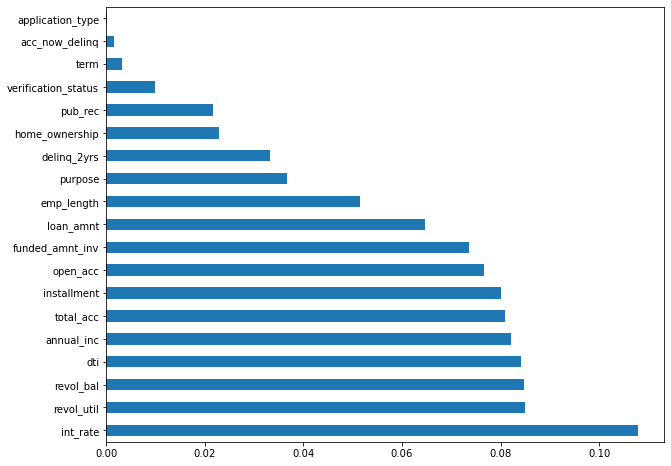

In [25]:
plt.figure(figsize=(10,8))
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
print(feat_importances)
feat_importances.nlargest(19).plot(kind='barh')
plt.show()

In [26]:
x=df.drop(['application_type','acc_now_delinq','term','home_ownership','pub_rec','delinq_2yrs'
           ,'purpose','emp_length','verification_status','loan_status'],axis=1)

# Importing important libraries 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

In [28]:
from sklearn.tree import DecisionTreeClassifier

## 1.Apply for imbalanced data

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [30]:
dtc=DecisionTreeClassifier()

In [31]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
predictions=dtc.predict(x_test)

In [33]:
print('Classification Report')
print(classification_report(y_test,predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test,predictions))
print('\n')
print('Accuracy',accuracy_score(y_test,predictions))
print('F1_Score',f1_score(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.14      0.16      0.15     19695
           1       0.93      0.92      0.92    232926

    accuracy                           0.86    252621
   macro avg       0.54      0.54      0.54    252621
weighted avg       0.87      0.86      0.86    252621

Confusion Matrix:
[[  3211  16484]
 [ 19413 213513]]


Accuracy 0.8579017579694483
F1_Score 0.9224557863834806


## 2.Apply SMOTE

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x, y)

In [36]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X_res, y_res, test_size=0.3)

In [37]:
dtc1=DecisionTreeClassifier()

In [38]:
dtc1.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [39]:
predictions1=dtc1.predict(x1_test)

In [40]:
print('Classification Report')
print(classification_report(y1_test,predictions1))
print("Confusion Matrix:")
print(confusion_matrix(y1_test,predictions1))
print('\n')
print('Accuracy',accuracy_score(y1_test,predictions1))
print('F1_Score',f1_score(y1_test,predictions1))

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.92      0.91    232994
           1       0.92      0.91      0.91    232892

    accuracy                           0.91    465886
   macro avg       0.91      0.91      0.91    465886
weighted avg       0.91      0.91      0.91    465886

Confusion Matrix:
[[214112  18882]
 [ 21810 211082]]


Accuracy 0.912656744353769
F1_Score 0.9120849681110325


## 3.Apply NearMiss

In [41]:
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
X1_res, y1_res = nr.fit_resample(x, y)

In [42]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X1_res, y1_res, test_size=0.3)

In [43]:
dtc2=DecisionTreeClassifier()

In [44]:
dtc2.fit(x2_train,y2_train)

DecisionTreeClassifier()

In [45]:
predictions2=dtc2.predict(x2_test)

In [46]:
print('Classification Report')
print(classification_report(y2_test,predictions2))
print("Confusion Matrix:")
print(confusion_matrix(y2_test,predictions2))
print('\n')
print('Accuracy',accuracy_score(y2_test,predictions2))
print('F1_Score',f1_score(y2_test,predictions2))

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.77      0.78     19661
           1       0.78      0.78      0.78     19694

    accuracy                           0.78     39355
   macro avg       0.78      0.78      0.78     39355
weighted avg       0.78      0.78      0.78     39355

Confusion Matrix:
[[15207  4454]
 [ 4310 15384]]


Accuracy 0.777309109388896
F1_Score 0.7783061823332996


In [47]:
x1=x
y1=y

# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

## 1.Apply for imbalanced Data

In [49]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x1, y1, test_size=0.3)

In [50]:
lr=LogisticRegression()

In [51]:
lr.fit(x3_train,y3_train)

LogisticRegression()

In [52]:
predictions3=lr.predict(x3_test)

In [53]:
print('Classification Report')
print(classification_report(y3_test,predictions3))
print("Confusion Matrix:")
print(confusion_matrix(y3_test,predictions3))
print('\n')
print('Accuracy',accuracy_score(y3_test,predictions3))
print('F1_Score',f1_score(y3_test,predictions3))

Classification Report
              precision    recall  f1-score   support

           0       0.44      0.01      0.01     19736
           1       0.92      1.00      0.96    232885

    accuracy                           0.92    252621
   macro avg       0.68      0.50      0.48    252621
weighted avg       0.88      0.92      0.89    252621

Confusion Matrix:
[[   101  19635]
 [   131 232754]]


Accuracy 0.9217563068786839
F1_Score 0.9592683720949402


## 2. Apply SMOTE

In [54]:
sm1 = SMOTE(random_state=42)
X2_res, y2_res = sm1.fit_resample(x1, y1)

In [55]:
x4_train, x4_test, y4_train, y4_test = train_test_split(X2_res, y2_res, test_size=0.3)

In [56]:
lr1=LogisticRegression()

In [57]:
lr1.fit(x4_train,y4_train)

LogisticRegression()

In [58]:
predictions4=lr1.predict(x4_test)

In [59]:
print('Classification Report')
print(classification_report(y4_test,predictions4))
print("Confusion Matrix:")
print(confusion_matrix(y4_test,predictions4))
print('\n')
print('Accuracy',accuracy_score(y4_test,predictions4))
print('F1_Score',f1_score(y4_test,predictions4))

Classification Report
              precision    recall  f1-score   support

           0       0.60      0.65      0.62    232697
           1       0.62      0.58      0.60    233189

    accuracy                           0.61    465886
   macro avg       0.61      0.61      0.61    465886
weighted avg       0.61      0.61      0.61    465886

Confusion Matrix:
[[150143  82554]
 [ 98332 134857]]


Accuracy 0.6117376353871977
F1_Score 0.5985663559698181


## Apply NearMiss

In [60]:
nr1 = NearMiss() 
X3_res, y3_res = nr1.fit_resample(x1, y1)

In [61]:
x5_train, x5_test, y5_train, y5_test = train_test_split(X3_res, y3_res, test_size=0.3)

In [62]:
lr2=LogisticRegression()

In [63]:
lr2.fit(x5_train,y5_train)

LogisticRegression()

In [64]:
predictions5=lr2.predict(x5_test)

In [65]:
print('Classification Report')
print(classification_report(y5_test,predictions5))
print("Confusion Matrix:")
print(confusion_matrix(y5_test,predictions5))
print('\n')
print("Accuracy:",accuracy_score(y5_test,predictions5))
print('F1_Score',f1_score(y5_test,predictions5))

Classification Report
              precision    recall  f1-score   support

           0       0.61      0.59      0.60     19675
           1       0.61      0.63      0.62     19680

    accuracy                           0.61     39355
   macro avg       0.61      0.61      0.61     39355
weighted avg       0.61      0.61      0.61     39355

Confusion Matrix:
[[11665  8010]
 [ 7333 12347]]


Accuracy: 0.610138483039004
F1_Score 0.6167794789819417


In [66]:
x2=x
y2=y

# 3.KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier

## 1. For imbalancing Data

In [68]:
x6_train, x6_test, y6_train, y6_test = train_test_split(x2, y2, test_size=0.3)

In [69]:
knn=KNeighborsClassifier()

In [70]:
knn.fit(x6_train,y6_train)

KNeighborsClassifier()

In [71]:
predictions6=knn.predict(x6_test)

In [72]:
print('Classification Report')
print(classification_report(y6_test,predictions6))
print("Confusion Matrix:")
print(confusion_matrix(y6_test,predictions6))
print('\n')
print("Accuracy",accuracy_score(y6_test,predictions6))
print("F1_Score",f1_score(y6_test,predictions6))

Classification Report
              precision    recall  f1-score   support

           0       0.16      0.01      0.02     19647
           1       0.92      0.99      0.96    232974

    accuracy                           0.92    252621
   macro avg       0.54      0.50      0.49    252621
weighted avg       0.86      0.92      0.88    252621

Confusion Matrix:
[[   230  19417]
 [  1186 231788]]


Accuracy 0.9184430431357646
F1_Score 0.9574475555528018


## 2 Apply SMOTE

In [73]:
sm2 = SMOTE(random_state=42)
X4_res, y4_res = sm2.fit_resample(x2, y2)

In [74]:
x7_train, x7_test, y7_train, y7_test = train_test_split(X4_res, y4_res, test_size=0.3)

In [75]:
knn1=KNeighborsClassifier()

In [76]:
knn1.fit(x7_train,y7_train)

KNeighborsClassifier()

In [77]:
predictions7=knn1.predict(x7_test)

In [78]:
print('Classification Report')
print(classification_report(y7_test,predictions7))
print("Confusion Matrix:")
print(confusion_matrix(y7_test,predictions7))
print('\n')
print("Accuracy:",accuracy_score(y7_test,predictions7))
print("f1_score:",f1_score(y7_test,predictions7))

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.89      0.81    233042
           1       0.86      0.70      0.77    232844

    accuracy                           0.79    465886
   macro avg       0.80      0.79      0.79    465886
weighted avg       0.80      0.79      0.79    465886

Confusion Matrix:
[[206814  26228]
 [ 70406 162438]]


Accuracy: 0.7925801590947141
f1_score: 0.7707432801119783


## 3.Apply NearMiss

In [79]:
nr2 = NearMiss() 
X5_res, y5_res = nr2.fit_resample(x2, y2)

In [80]:
x8_train, x8_test, y8_train, y8_test = train_test_split(X5_res, y5_res, test_size=0.3)

In [81]:
knn2=KNeighborsClassifier()

In [82]:
knn2.fit(x8_train,y8_train)

KNeighborsClassifier()

In [83]:
predictions8=knn2.predict(x8_test)

In [84]:
print('Classification Report')
print(classification_report(y8_test,predictions8))
print("Confusion Matrix:")
print(confusion_matrix(y8_test,predictions8))
print('\n')
print("Accuracy:",accuracy_score(y8_test,predictions8))
print("F1_Score:",f1_score(y8_test,predictions8))

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.74      0.82     19640
           1       0.78      0.95      0.86     19715

    accuracy                           0.84     39355
   macro avg       0.86      0.84      0.84     39355
weighted avg       0.86      0.84      0.84     39355

Confusion Matrix:
[[14476  5164]
 [ 1052 18663]]


Accuracy: 0.8420531063397281
F1_Score: 0.8572412842772495


In [85]:
x3=x
y3=y

# 4.Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

## 1.For imbalancing Data

In [87]:
x9_train, x9_test, y9_train, y9_test = train_test_split(x3, y3, test_size=0.3)

In [88]:
rfc=RandomForestClassifier()

In [89]:
rfc.fit(x9_train,y9_train)

RandomForestClassifier()

In [90]:
predictions9=rfc.predict(x9_test)

In [91]:
print('Classification Report')
print(classification_report(y9_test,predictions9))
print("Confusion Matrix:")
print(confusion_matrix(y9_test,predictions9))
print('\n')
print("Accuracy:",accuracy_score(y9_test,predictions9))
print("f1_score:",f1_score(y9_test,predictions9))

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.01      0.02     19784
           1       0.92      1.00      0.96    232837

    accuracy                           0.92    252621
   macro avg       0.82      0.51      0.49    252621
weighted avg       0.91      0.92      0.89    252621

Confusion Matrix:
[[   236  19548]
 [    94 232743]]


Accuracy: 0.9222471607665238
f1_score: 0.9595117164954403


## 2.Apply SMOTE

In [92]:
sm3 = SMOTE(random_state=42)
X6_res, y6_res = sm3.fit_resample(x3, y3)

In [93]:
x10_train, x10_test, y10_train, y10_test = train_test_split(X6_res, y6_res, test_size=0.3)

In [94]:
rfc1=RandomForestClassifier()

In [95]:
rfc1.fit(x10_train,y10_train)

RandomForestClassifier()

In [96]:
predictions10=rfc1.predict(x10_test)

In [97]:
print('Classification Report')
print(classification_report(y10_test,predictions10))
print("Confusion Matrix:")
print(confusion_matrix(y10_test,predictions10))
print('\n')
print("accuracy:",accuracy_score(y10_test,predictions10))
print("f1_score:",f1_score(y10_test,predictions10))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.92      0.95    232824
           1       0.93      0.98      0.95    233062

    accuracy                           0.95    465886
   macro avg       0.95      0.95      0.95    465886
weighted avg       0.95      0.95      0.95    465886

Confusion Matrix:
[[214576  18248]
 [  5283 227779]]


accuracy: 0.9494919357954521
f1_score: 0.9508838650021186


## 3.Apply NearMiss

In [98]:
nr3 = NearMiss()
X7_res, y7_res = nr3.fit_resample(x3, y3)

In [99]:
x11_train, x11_test, y11_train, y11_test = train_test_split(X7_res, y7_res, test_size=0.3)

In [100]:
rfc2=RandomForestClassifier()

In [101]:
rfc2.fit(x11_train,y11_train)

RandomForestClassifier()

In [102]:
predictions11=rfc2.predict(x11_test)

In [103]:
print('Classification Report')
print(classification_report(y11_test,predictions11))
print("Confusion Matrix:")
print(confusion_matrix(y11_test,predictions11))
print('\n')
print("accuracy:",accuracy_score(y11_test,predictions11))
print("f1_score:",f1_score(y11_test,predictions11))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.82      0.84     19678
           1       0.83      0.87      0.85     19677

    accuracy                           0.85     39355
   macro avg       0.85      0.85      0.85     39355
weighted avg       0.85      0.85      0.85     39355

Confusion Matrix:
[[16101  3577]
 [ 2508 17169]]


accuracy: 0.8453817812222081
f1_score: 0.8494668876629642


# Combined models smote

In [104]:
from sklearn.ensemble import VotingClassifier

In [105]:
x5=x
y5=y

In [106]:
sm4 = SMOTE(random_state=42)
X9_res, y9_res = sm4.fit_resample(x5, y5)

In [107]:
x13_train, x13_test, y13_train, y13_test = train_test_split(X9_res, y9_res, test_size=0.3)

In [108]:
models = [] 
models.append(('LR', LogisticRegression())) 
models.append(('RFC', RandomForestClassifier())) 
models.append(('DTC', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))

In [109]:
voting_soft1 = VotingClassifier(estimators = models, voting ='soft') 
voting_soft1.fit(x13_train, y13_train) 
predictions13 = voting_soft1.predict(x13_test)

In [110]:
print('Classification Report')
print(classification_report(y13_test,predictions13))
print("Confusion Matrix:")
print(confusion_matrix(y13_test,predictions13))
print('\n')
print("Accuracy:",accuracy_score(y13_test,predictions13))
print("F1_Score:",f1_score(y13_test,predictions13))

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94    232583
           1       0.94      0.94      0.94    233303

    accuracy                           0.94    465886
   macro avg       0.94      0.94      0.94    465886
weighted avg       0.94      0.94      0.94    465886

Confusion Matrix:
[[217793  14790]
 [ 13208 220095]]


Accuracy: 0.9399037532786991
F1_Score: 0.9401992362042598


In [111]:
voting_hard1 = VotingClassifier(estimators = models, voting ='hard') 
voting_hard1.fit(x13_train, y13_train) 
H_predictions = voting_hard1.predict(x13_test)

In [112]:
print('Classification Report')
print(classification_report(y13_test,H_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y13_test,H_predictions))
print('\n')
print("Accuracy:",accuracy_score(y13_test,H_predictions))
print("F1_Score:",f1_score(y13_test,H_predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.97      0.89    232583
           1       0.96      0.80      0.88    233303

    accuracy                           0.89    465886
   macro avg       0.90      0.89      0.89    465886
weighted avg       0.90      0.89      0.89    465886

Confusion Matrix:
[[225540   7043]
 [ 45899 187404]]


Accuracy: 0.8863627582713368
F1_Score: 0.8762314436002339


# Combined Model for NearMiss

In [113]:
nr5 = NearMiss()
X10_res, y10_res = nr5.fit_resample(x5, y5)

In [114]:
x14_train, x14_test, y14_train, y14_test = train_test_split(X10_res, y10_res, test_size=0.3)

In [115]:
voting_soft2 = VotingClassifier(estimators = models, voting ='soft')
voting_soft2.fit(x14_train, y14_train) 
predictions14= voting_soft2.predict(x14_test)

In [116]:
print('Classification Report')
print(classification_report(y14_test,predictions14))
print("Confusion Matrix:")
print(confusion_matrix(y14_test,predictions14))
print('\n')
print("Accuracy:",accuracy_score(y14_test,predictions14))
print("f1_score:",f1_score(y14_test,predictions14))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.80      0.83     19731
           1       0.81      0.88      0.84     19624

    accuracy                           0.84     39355
   macro avg       0.84      0.84      0.84     39355
weighted avg       0.84      0.84      0.84     39355

Confusion Matrix:
[[15714  4017]
 [ 2407 17217]]


Accuracy: 0.8367678820988439
f1_score: 0.8427725292476382


In [117]:
voting_hard2 = VotingClassifier(estimators = models, voting ='hard') 
voting_hard2.fit(x14_train, y14_train) 
H_predictions2 = voting_hard1.predict(x14_test)

In [118]:
print('Classification Report')
print(classification_report(y14_test,H_predictions2))
print("Confusion Matrix:")
print(confusion_matrix(y14_test,H_predictions2))
print('\n')
print("Accuracy:",accuracy_score(y14_test,H_predictions2))
print("f1_score:",f1_score(y14_test,H_predictions2))

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.90      0.84     19731
           1       0.89      0.76      0.82     19624

    accuracy                           0.83     39355
   macro avg       0.84      0.83      0.83     39355
weighted avg       0.84      0.83      0.83     39355

Confusion Matrix:
[[17834  1897]
 [ 4788 14836]]


Accuracy: 0.8301359420658112
f1_score: 0.8161289435321946


# Prediction 

In [130]:
# Sample Data
sample_input=[[10000.0,4975.0,10.65,162.87,24000.0,27.65,3.0,13648.0,83.7,9.0]]
df_test=pd.DataFrame(sample_input, columns=['loan_amnt','funded_amnt_inv',
'int_rate','installment','annual_inc','dti','open_acc','revol_bal','revol_util',
'total_acc'])
predictions_test = voting_soft1.predict(df_test)
if predictions_test[0]==1:
    print(' NOT Risky')
else:
    print('Risky')

 NOT Risky


## djkfbvkj,rbfjkh